### this feeds the aal-sphere FC to vae
* code allows using all four spheres, or picking one of them

In [1]:
# Auto-Reload for Fast Iteration
%load_ext autoreload
%autoreload 2

In [4]:
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GroupKFold
from sklearn.manifold import TSNE
import umap.umap_ as umap

/Users/liuq13/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# import custom functions from .py scripts
from models import VAE, CVAE 
from train_utils import train_vae, loss_function, get_latent_mu, compute_condition_distances
from data_utils import load_all_fc_data, preprocess_for_torch
from utils_plotting import plot_vae_losses, plot_latent_embedding_by_condition_and_subject, plot_subject_distance_comparison

In [8]:
sub_cond_path = '/Users/liuq13/NODEAP_scripts/data_input/SubConds.xlsx'
base_nifti_folder = '/Volumes/X9Pro/NODEAP/FuncConn_AAL'
condition_map = {'N': 0, 'S': 1, 'C': 2}

In [9]:
# Load and preprocess
use_roi = 0
all_corr_data, all_tms_type, all_subject_id, all_stimloc, all_session = load_all_fc_data(sub_cond_path, 
                                                               base_nifti_folder, 
                                                               mat_filename='conn_matrix_w_sphere.mat',
                                                               key_name='correlation_matrix',row_idx=use_roi)
X_tensor = preprocess_for_torch(all_corr_data)
dataset = TensorDataset(X_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

[WARN] File not found: /Volumes/X9Pro/NODEAP/FuncConn_AAL/NODEAP_30/S3D2/conn_matrix_w_sphere.mat
[WARN] File not found: /Volumes/X9Pro/NODEAP/FuncConn_AAL/NODEAP_44/S1D1/conn_matrix_w_sphere.mat
[WARN] File not found: /Volumes/X9Pro/NODEAP/FuncConn_AAL/NODEAP_83/S3D1/conn_matrix_w_sphere.mat
[WARN] File not found: /Volumes/X9Pro/NODEAP/FuncConn_AAL/NODEAP_87/D0/conn_matrix_w_sphere.mat
[WARN] File not found: /Volumes/X9Pro/NODEAP/FuncConn_AAL/NODEAP_88/D0/conn_matrix_w_sphere.mat
Columns with NaN: 14 / 116
Tensor shape after preprocessing: torch.Size([331, 102])


In [10]:
# Set up model, optimizer, and device
input_dim = X_tensor.shape[1]
latent_dim = 10
NUM_EPOCH = 500
LR = 3e-4
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VAE(input_dim=input_dim, latent_dim=latent_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
total_loss_hist, recon_loss_hist, kld_loss_hist = train_vae(model, dataloader, optimizer, device=device, epochs=NUM_EPOCH)


===== Epoch 1 =====


Epoch 1/500: 100%|█████████████████████████████| 11/11 [00:00<00:00, 284.32it/s]


Epoch 1, Loss: 107.0145, Recon: 106.6863, KL: 0.3282

===== Epoch 2 =====


Epoch 2/500: 100%|████████████████████████████| 11/11 [00:00<00:00, 1015.35it/s]


Epoch 2, Loss: 103.2755, Recon: 102.6745, KL: 0.6009

===== Epoch 3 =====


Epoch 3/500: 100%|█████████████████████████████| 11/11 [00:00<00:00, 982.69it/s]


Epoch 3, Loss: 98.4823, Recon: 97.1965, KL: 1.2858

===== Epoch 4 =====


Epoch 4/500: 100%|████████████████████████████| 11/11 [00:00<00:00, 1020.31it/s]


Epoch 4, Loss: 90.5347, Recon: 87.8141, KL: 2.7206

===== Epoch 5 =====


Epoch 5/500: 100%|████████████████████████████| 11/11 [00:00<00:00, 1059.92it/s]


Epoch 5, Loss: 81.7131, Recon: 76.5634, KL: 5.1497

===== Epoch 6 =====


Epoch 6/500: 100%|████████████████████████████| 11/11 [00:00<00:00, 1010.74it/s]


Epoch 6, Loss: 74.8402, Recon: 68.0987, KL: 6.7414

===== Epoch 7 =====


Epoch 7/500: 100%|████████████████████████████| 11/11 [00:00<00:00, 1008.07it/s]


Epoch 7, Loss: 68.4784, Recon: 61.2414, KL: 7.2370

===== Epoch 8 =====


Epoch 8/500: 100%|████████████████████████████| 11/11 [00:00<00:00, 1051.23it/s]


Epoch 8, Loss: 64.0416, Recon: 55.8295, KL: 8.2122

===== Epoch 9 =====


Epoch 9/500: 100%|█████████████████████████████| 11/11 [00:00<00:00, 964.65it/s]


Epoch 9, Loss: 61.5732, Recon: 52.9300, KL: 8.6432

===== Epoch 10 =====


Epoch 10/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1027.53it/s]


Epoch 10, Loss: 59.0026, Recon: 50.1758, KL: 8.8268

===== Epoch 11 =====


Epoch 11/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1014.19it/s]


Epoch 11, Loss: 57.6315, Recon: 48.7886, KL: 8.8429

===== Epoch 12 =====


Epoch 12/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1005.13it/s]


Epoch 12, Loss: 56.1329, Recon: 47.2892, KL: 8.8437

===== Epoch 13 =====


Epoch 13/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1040.98it/s]


Epoch 13, Loss: 55.4920, Recon: 46.7316, KL: 8.7604

===== Epoch 14 =====


Epoch 14/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1022.41it/s]


Epoch 14, Loss: 54.3441, Recon: 45.6264, KL: 8.7177

===== Epoch 15 =====


Epoch 15/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1038.92it/s]


Epoch 15, Loss: 53.3506, Recon: 44.3203, KL: 9.0303

===== Epoch 16 =====


Epoch 16/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1053.03it/s]


Epoch 16, Loss: 52.1035, Recon: 42.8924, KL: 9.2111

===== Epoch 17 =====


Epoch 17/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1016.29it/s]


Epoch 17, Loss: 51.2060, Recon: 41.8289, KL: 9.3771

===== Epoch 18 =====


Epoch 18/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1028.43it/s]


Epoch 18, Loss: 50.8010, Recon: 41.3036, KL: 9.4974

===== Epoch 19 =====


Epoch 19/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1066.34it/s]


Epoch 19, Loss: 49.8679, Recon: 40.1628, KL: 9.7051

===== Epoch 20 =====


Epoch 20/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1048.81it/s]


Epoch 20, Loss: 49.2314, Recon: 39.3854, KL: 9.8460

===== Epoch 21 =====


Epoch 21/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1035.70it/s]


Epoch 21, Loss: 47.9945, Recon: 38.1721, KL: 9.8224

===== Epoch 22 =====


Epoch 22/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1015.03it/s]


Epoch 22, Loss: 47.7107, Recon: 37.7923, KL: 9.9184

===== Epoch 23 =====


Epoch 23/500: 100%|████████████████████████████| 11/11 [00:00<00:00, 985.92it/s]


Epoch 23, Loss: 46.9692, Recon: 36.9378, KL: 10.0314

===== Epoch 24 =====


Epoch 24/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1083.14it/s]


Epoch 24, Loss: 46.4350, Recon: 36.3964, KL: 10.0386

===== Epoch 25 =====


Epoch 25/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1040.02it/s]


Epoch 25, Loss: 46.0269, Recon: 35.7581, KL: 10.2688

===== Epoch 26 =====


Epoch 26/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1044.16it/s]


Epoch 26, Loss: 45.5073, Recon: 34.9477, KL: 10.5596

===== Epoch 27 =====


Epoch 27/500: 100%|████████████████████████████| 11/11 [00:00<00:00, 402.30it/s]


Epoch 27, Loss: 45.0179, Recon: 34.4031, KL: 10.6148

===== Epoch 28 =====


Epoch 28/500: 100%|████████████████████████████| 11/11 [00:00<00:00, 931.41it/s]


Epoch 28, Loss: 44.4359, Recon: 33.6971, KL: 10.7388

===== Epoch 29 =====


Epoch 29/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1039.04it/s]


Epoch 29, Loss: 43.8248, Recon: 33.1977, KL: 10.6271

===== Epoch 30 =====


Epoch 30/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1029.48it/s]


Epoch 30, Loss: 43.6869, Recon: 33.1071, KL: 10.5798

===== Epoch 31 =====


Epoch 31/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1030.93it/s]


Epoch 31, Loss: 43.3793, Recon: 32.6871, KL: 10.6922

===== Epoch 32 =====


Epoch 32/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1029.55it/s]


Epoch 32, Loss: 42.9767, Recon: 32.3247, KL: 10.6519

===== Epoch 33 =====


Epoch 33/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1016.33it/s]


Epoch 33, Loss: 43.0335, Recon: 32.3391, KL: 10.6944

===== Epoch 34 =====


Epoch 34/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1071.39it/s]


Epoch 34, Loss: 42.8578, Recon: 31.9979, KL: 10.8599

===== Epoch 35 =====


Epoch 35/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1044.42it/s]


Epoch 35, Loss: 42.5299, Recon: 31.5623, KL: 10.9676

===== Epoch 36 =====


Epoch 36/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1030.36it/s]


Epoch 36, Loss: 42.3113, Recon: 31.2926, KL: 11.0187

===== Epoch 37 =====


Epoch 37/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1024.50it/s]


Epoch 37, Loss: 42.1613, Recon: 31.1871, KL: 10.9742

===== Epoch 38 =====


Epoch 38/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1017.68it/s]


Epoch 38, Loss: 41.4856, Recon: 30.5271, KL: 10.9585

===== Epoch 39 =====


Epoch 39/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1058.10it/s]


Epoch 39, Loss: 41.7051, Recon: 30.8598, KL: 10.8452

===== Epoch 40 =====


Epoch 40/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1035.19it/s]


Epoch 40, Loss: 42.0357, Recon: 31.0443, KL: 10.9914

===== Epoch 41 =====


Epoch 41/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1082.71it/s]


Epoch 41, Loss: 41.6129, Recon: 30.5001, KL: 11.1128

===== Epoch 42 =====


Epoch 42/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1081.72it/s]


Epoch 42, Loss: 40.9716, Recon: 29.7695, KL: 11.2021

===== Epoch 43 =====


Epoch 43/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1093.15it/s]


Epoch 43, Loss: 40.8984, Recon: 29.7856, KL: 11.1128

===== Epoch 44 =====


Epoch 44/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1057.88it/s]


Epoch 44, Loss: 41.0953, Recon: 30.0256, KL: 11.0697

===== Epoch 45 =====


Epoch 45/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1080.55it/s]


Epoch 45, Loss: 40.6312, Recon: 29.5136, KL: 11.1176

===== Epoch 46 =====


Epoch 46/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1033.94it/s]


Epoch 46, Loss: 40.8749, Recon: 29.6355, KL: 11.2394

===== Epoch 47 =====


Epoch 47/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1058.32it/s]


Epoch 47, Loss: 40.6260, Recon: 29.3670, KL: 11.2591

===== Epoch 48 =====


Epoch 48/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1036.77it/s]


Epoch 48, Loss: 40.4029, Recon: 29.2437, KL: 11.1592

===== Epoch 49 =====


Epoch 49/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1075.46it/s]


Epoch 49, Loss: 40.0438, Recon: 28.7574, KL: 11.2864

===== Epoch 50 =====


Epoch 50/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1071.07it/s]


Epoch 50, Loss: 39.9395, Recon: 28.7213, KL: 11.2183

===== Epoch 51 =====


Epoch 51/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1024.68it/s]


Epoch 51, Loss: 39.5635, Recon: 28.4319, KL: 11.1316

===== Epoch 52 =====


Epoch 52/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1087.81it/s]


Epoch 52, Loss: 39.7792, Recon: 28.5773, KL: 11.2019

===== Epoch 53 =====


Epoch 53/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1061.68it/s]


Epoch 53, Loss: 39.5577, Recon: 28.3003, KL: 11.2574

===== Epoch 54 =====


Epoch 54/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1020.87it/s]


Epoch 54, Loss: 39.4170, Recon: 28.2322, KL: 11.1848

===== Epoch 55 =====


Epoch 55/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1071.07it/s]


Epoch 55, Loss: 39.3805, Recon: 28.0438, KL: 11.3367

===== Epoch 56 =====


Epoch 56/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1052.72it/s]


Epoch 56, Loss: 39.1901, Recon: 27.9067, KL: 11.2834

===== Epoch 57 =====


Epoch 57/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1107.77it/s]


Epoch 57, Loss: 39.0744, Recon: 27.7082, KL: 11.3662

===== Epoch 58 =====


Epoch 58/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1097.12it/s]


Epoch 58, Loss: 38.8761, Recon: 27.4869, KL: 11.3892

===== Epoch 59 =====


Epoch 59/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1083.09it/s]


Epoch 59, Loss: 38.7837, Recon: 27.3224, KL: 11.4613

===== Epoch 60 =====


Epoch 60/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1117.78it/s]


Epoch 60, Loss: 38.9882, Recon: 27.5167, KL: 11.4715

===== Epoch 61 =====


Epoch 61/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1031.30it/s]


Epoch 61, Loss: 38.4287, Recon: 26.8938, KL: 11.5349

===== Epoch 62 =====


Epoch 62/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1037.35it/s]


Epoch 62, Loss: 38.3833, Recon: 26.8144, KL: 11.5689

===== Epoch 63 =====


Epoch 63/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1047.69it/s]


Epoch 63, Loss: 38.3625, Recon: 26.9607, KL: 11.4018

===== Epoch 64 =====


Epoch 64/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1050.41it/s]


Epoch 64, Loss: 38.2216, Recon: 26.6106, KL: 11.6109

===== Epoch 65 =====


Epoch 65/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1065.28it/s]


Epoch 65, Loss: 37.8165, Recon: 26.2940, KL: 11.5225

===== Epoch 66 =====


Epoch 66/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1042.35it/s]


Epoch 66, Loss: 37.8494, Recon: 26.3656, KL: 11.4838

===== Epoch 67 =====


Epoch 67/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1120.76it/s]


Epoch 67, Loss: 37.9481, Recon: 26.4115, KL: 11.5366

===== Epoch 68 =====


Epoch 68/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1076.64it/s]


Epoch 68, Loss: 37.8522, Recon: 26.3841, KL: 11.4682

===== Epoch 69 =====


Epoch 69/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1070.15it/s]


Epoch 69, Loss: 37.9636, Recon: 26.3388, KL: 11.6248

===== Epoch 70 =====


Epoch 70/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1041.66it/s]


Epoch 70, Loss: 37.5979, Recon: 25.8723, KL: 11.7256

===== Epoch 71 =====


Epoch 71/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1070.57it/s]


Epoch 71, Loss: 37.5809, Recon: 25.7861, KL: 11.7948

===== Epoch 72 =====


Epoch 72/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1072.56it/s]


Epoch 72, Loss: 37.6091, Recon: 25.8886, KL: 11.7205

===== Epoch 73 =====


Epoch 73/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1016.64it/s]


Epoch 73, Loss: 37.5636, Recon: 25.7952, KL: 11.7683

===== Epoch 74 =====


Epoch 74/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1021.91it/s]


Epoch 74, Loss: 37.4200, Recon: 25.6364, KL: 11.7836

===== Epoch 75 =====


Epoch 75/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1034.31it/s]


Epoch 75, Loss: 37.3246, Recon: 25.5614, KL: 11.7632

===== Epoch 76 =====


Epoch 76/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1059.53it/s]


Epoch 76, Loss: 36.9770, Recon: 25.1455, KL: 11.8315

===== Epoch 77 =====


Epoch 77/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1062.93it/s]


Epoch 77, Loss: 37.1897, Recon: 25.4193, KL: 11.7704

===== Epoch 78 =====


Epoch 78/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1045.44it/s]


Epoch 78, Loss: 36.8740, Recon: 25.1699, KL: 11.7041

===== Epoch 79 =====


Epoch 79/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1070.45it/s]


Epoch 79, Loss: 36.7920, Recon: 25.0171, KL: 11.7749

===== Epoch 80 =====


Epoch 80/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1056.28it/s]


Epoch 80, Loss: 37.0901, Recon: 25.3728, KL: 11.7173

===== Epoch 81 =====


Epoch 81/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1063.44it/s]


Epoch 81, Loss: 37.1281, Recon: 25.3909, KL: 11.7372

===== Epoch 82 =====


Epoch 82/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1090.85it/s]


Epoch 82, Loss: 37.0974, Recon: 25.1577, KL: 11.9396

===== Epoch 83 =====


Epoch 83/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1046.22it/s]


Epoch 83, Loss: 36.7268, Recon: 24.6380, KL: 12.0888

===== Epoch 84 =====


Epoch 84/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1085.12it/s]


Epoch 84, Loss: 36.7818, Recon: 24.8514, KL: 11.9304

===== Epoch 85 =====


Epoch 85/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1031.88it/s]


Epoch 85, Loss: 36.5445, Recon: 24.6587, KL: 11.8857

===== Epoch 86 =====


Epoch 86/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1053.03it/s]


Epoch 86, Loss: 36.5982, Recon: 24.7550, KL: 11.8433

===== Epoch 87 =====


Epoch 87/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1057.90it/s]


Epoch 87, Loss: 36.7328, Recon: 24.8178, KL: 11.9150

===== Epoch 88 =====


Epoch 88/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1062.80it/s]


Epoch 88, Loss: 36.5379, Recon: 24.4718, KL: 12.0661

===== Epoch 89 =====


Epoch 89/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1059.41it/s]


Epoch 89, Loss: 36.6748, Recon: 24.5699, KL: 12.1048

===== Epoch 90 =====


Epoch 90/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1050.73it/s]


Epoch 90, Loss: 36.2003, Recon: 24.0808, KL: 12.1195

===== Epoch 91 =====


Epoch 91/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1049.91it/s]


Epoch 91, Loss: 36.2906, Recon: 24.3829, KL: 11.9077

===== Epoch 92 =====


Epoch 92/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1082.07it/s]


Epoch 92, Loss: 36.1179, Recon: 24.2045, KL: 11.9134

===== Epoch 93 =====


Epoch 93/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1045.20it/s]


Epoch 93, Loss: 36.2921, Recon: 24.2399, KL: 12.0522

===== Epoch 94 =====


Epoch 94/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1084.39it/s]


Epoch 94, Loss: 36.3058, Recon: 24.2497, KL: 12.0561

===== Epoch 95 =====


Epoch 95/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1083.95it/s]


Epoch 95, Loss: 36.0681, Recon: 24.0287, KL: 12.0395

===== Epoch 96 =====


Epoch 96/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1113.46it/s]


Epoch 96, Loss: 36.0222, Recon: 23.9305, KL: 12.0917

===== Epoch 97 =====


Epoch 97/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1060.85it/s]


Epoch 97, Loss: 35.7226, Recon: 23.6299, KL: 12.0926

===== Epoch 98 =====


Epoch 98/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1057.27it/s]


Epoch 98, Loss: 35.9685, Recon: 23.9700, KL: 11.9984

===== Epoch 99 =====


Epoch 99/500: 100%|████████████████████████████| 11/11 [00:00<00:00, 996.19it/s]


Epoch 99, Loss: 35.6721, Recon: 23.7292, KL: 11.9429

===== Epoch 100 =====


Epoch 100/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1057.81it/s]


Epoch 100, Loss: 36.0939, Recon: 24.0850, KL: 12.0089

===== Epoch 101 =====


Epoch 101/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1082.88it/s]


Epoch 101, Loss: 35.8398, Recon: 23.6923, KL: 12.1475

===== Epoch 102 =====


Epoch 102/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1058.83it/s]


Epoch 102, Loss: 35.9274, Recon: 23.8215, KL: 12.1059

===== Epoch 103 =====


Epoch 103/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1036.68it/s]


Epoch 103, Loss: 35.6560, Recon: 23.5241, KL: 12.1319

===== Epoch 104 =====


Epoch 104/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1029.87it/s]


Epoch 104, Loss: 35.7084, Recon: 23.5635, KL: 12.1449

===== Epoch 105 =====


Epoch 105/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1033.26it/s]


Epoch 105, Loss: 35.1905, Recon: 23.0059, KL: 12.1846

===== Epoch 106 =====


Epoch 106/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1052.33it/s]


Epoch 106, Loss: 35.4610, Recon: 23.4058, KL: 12.0552

===== Epoch 107 =====


Epoch 107/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1081.39it/s]


Epoch 107, Loss: 35.2926, Recon: 23.2693, KL: 12.0233

===== Epoch 108 =====


Epoch 108/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1058.61it/s]


Epoch 108, Loss: 35.5945, Recon: 23.6205, KL: 11.9741

===== Epoch 109 =====


Epoch 109/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1068.88it/s]


Epoch 109, Loss: 35.2990, Recon: 23.0823, KL: 12.2167

===== Epoch 110 =====


Epoch 110/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1055.75it/s]


Epoch 110, Loss: 35.3923, Recon: 23.2385, KL: 12.1538

===== Epoch 111 =====


Epoch 111/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1077.47it/s]


Epoch 111, Loss: 35.3272, Recon: 23.2143, KL: 12.1128

===== Epoch 112 =====


Epoch 112/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1068.29it/s]


Epoch 112, Loss: 35.0518, Recon: 22.8791, KL: 12.1727

===== Epoch 113 =====


Epoch 113/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1057.42it/s]


Epoch 113, Loss: 35.2293, Recon: 23.1453, KL: 12.0840

===== Epoch 114 =====


Epoch 114/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1094.94it/s]


Epoch 114, Loss: 35.0723, Recon: 22.8055, KL: 12.2668

===== Epoch 115 =====


Epoch 115/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1043.43it/s]


Epoch 115, Loss: 35.0033, Recon: 22.7550, KL: 12.2483

===== Epoch 116 =====


Epoch 116/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1052.23it/s]


Epoch 116, Loss: 35.1052, Recon: 22.9001, KL: 12.2051

===== Epoch 117 =====


Epoch 117/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1099.77it/s]


Epoch 117, Loss: 34.9084, Recon: 22.6412, KL: 12.2672

===== Epoch 118 =====


Epoch 118/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1084.05it/s]


Epoch 118, Loss: 34.9685, Recon: 22.6278, KL: 12.3407

===== Epoch 119 =====


Epoch 119/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1035.28it/s]


Epoch 119, Loss: 34.9237, Recon: 22.7619, KL: 12.1618

===== Epoch 120 =====


Epoch 120/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1042.16it/s]


Epoch 120, Loss: 34.8842, Recon: 22.6478, KL: 12.2364

===== Epoch 121 =====


Epoch 121/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1080.04it/s]


Epoch 121, Loss: 34.6165, Recon: 22.3826, KL: 12.2339

===== Epoch 122 =====


Epoch 122/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1065.80it/s]


Epoch 122, Loss: 34.5965, Recon: 22.4008, KL: 12.1957

===== Epoch 123 =====


Epoch 123/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1053.65it/s]


Epoch 123, Loss: 34.6252, Recon: 22.4398, KL: 12.1855

===== Epoch 124 =====


Epoch 124/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1090.95it/s]


Epoch 124, Loss: 34.6946, Recon: 22.5316, KL: 12.1630

===== Epoch 125 =====


Epoch 125/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1085.23it/s]


Epoch 125, Loss: 34.4526, Recon: 22.2624, KL: 12.1902

===== Epoch 126 =====


Epoch 126/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1071.52it/s]


Epoch 126, Loss: 34.5607, Recon: 22.4040, KL: 12.1567

===== Epoch 127 =====


Epoch 127/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1068.07it/s]


Epoch 127, Loss: 34.8063, Recon: 22.5010, KL: 12.3053

===== Epoch 128 =====


Epoch 128/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1091.16it/s]


Epoch 128, Loss: 34.6899, Recon: 22.3248, KL: 12.3650

===== Epoch 129 =====


Epoch 129/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1099.79it/s]


Epoch 129, Loss: 34.5394, Recon: 22.1660, KL: 12.3734

===== Epoch 130 =====


Epoch 130/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1093.15it/s]


Epoch 130, Loss: 34.6059, Recon: 22.3130, KL: 12.2929

===== Epoch 131 =====


Epoch 131/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1090.07it/s]


Epoch 131, Loss: 34.5617, Recon: 22.1798, KL: 12.3818

===== Epoch 132 =====


Epoch 132/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1065.48it/s]


Epoch 132, Loss: 34.6375, Recon: 22.2109, KL: 12.4266

===== Epoch 133 =====


Epoch 133/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1075.59it/s]


Epoch 133, Loss: 34.2873, Recon: 21.7850, KL: 12.5023

===== Epoch 134 =====


Epoch 134/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1071.42it/s]


Epoch 134, Loss: 34.4252, Recon: 22.0231, KL: 12.4020

===== Epoch 135 =====


Epoch 135/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1066.41it/s]


Epoch 135, Loss: 34.1855, Recon: 21.6916, KL: 12.4939

===== Epoch 136 =====


Epoch 136/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1058.10it/s]


Epoch 136, Loss: 34.2377, Recon: 21.9071, KL: 12.3306

===== Epoch 137 =====


Epoch 137/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1084.41it/s]


Epoch 137, Loss: 34.3356, Recon: 21.9889, KL: 12.3467

===== Epoch 138 =====


Epoch 138/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1074.94it/s]


Epoch 138, Loss: 34.3258, Recon: 21.9124, KL: 12.4133

===== Epoch 139 =====


Epoch 139/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1078.98it/s]


Epoch 139, Loss: 34.2727, Recon: 21.8662, KL: 12.4065

===== Epoch 140 =====


Epoch 140/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1068.91it/s]


Epoch 140, Loss: 34.0598, Recon: 21.6725, KL: 12.3873

===== Epoch 141 =====


Epoch 141/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1098.82it/s]


Epoch 141, Loss: 34.0450, Recon: 21.6504, KL: 12.3946

===== Epoch 142 =====


Epoch 142/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1058.61it/s]


Epoch 142, Loss: 34.2171, Recon: 21.8344, KL: 12.3827

===== Epoch 143 =====


Epoch 143/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1095.20it/s]


Epoch 143, Loss: 34.3173, Recon: 21.8757, KL: 12.4416

===== Epoch 144 =====


Epoch 144/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1045.25it/s]


Epoch 144, Loss: 34.2685, Recon: 21.6523, KL: 12.6162

===== Epoch 145 =====


Epoch 145/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1072.24it/s]


Epoch 145, Loss: 33.8005, Recon: 21.1922, KL: 12.6083

===== Epoch 146 =====


Epoch 146/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1054.83it/s]


Epoch 146, Loss: 33.6913, Recon: 21.1728, KL: 12.5185

===== Epoch 147 =====


Epoch 147/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1080.15it/s]


Epoch 147, Loss: 33.6628, Recon: 21.3225, KL: 12.3403

===== Epoch 148 =====


Epoch 148/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1031.42it/s]


Epoch 148, Loss: 33.9956, Recon: 21.8164, KL: 12.1792

===== Epoch 149 =====


Epoch 149/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1081.92it/s]


Epoch 149, Loss: 33.8977, Recon: 21.5654, KL: 12.3323

===== Epoch 150 =====


Epoch 150/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1035.58it/s]


Epoch 150, Loss: 33.7380, Recon: 21.2531, KL: 12.4849

===== Epoch 151 =====


Epoch 151/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1079.89it/s]


Epoch 151, Loss: 34.0439, Recon: 21.4342, KL: 12.6097

===== Epoch 152 =====


Epoch 152/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1098.01it/s]


Epoch 152, Loss: 33.6872, Recon: 21.0500, KL: 12.6372

===== Epoch 153 =====


Epoch 153/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1063.02it/s]


Epoch 153, Loss: 33.9469, Recon: 21.3770, KL: 12.5699

===== Epoch 154 =====


Epoch 154/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1029.19it/s]


Epoch 154, Loss: 33.7733, Recon: 21.1927, KL: 12.5806

===== Epoch 155 =====


Epoch 155/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1061.17it/s]


Epoch 155, Loss: 33.7098, Recon: 21.1693, KL: 12.5405

===== Epoch 156 =====


Epoch 156/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1060.02it/s]


Epoch 156, Loss: 33.7317, Recon: 21.1080, KL: 12.6237

===== Epoch 157 =====


Epoch 157/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1040.32it/s]


Epoch 157, Loss: 33.5595, Recon: 21.0410, KL: 12.5185

===== Epoch 158 =====


Epoch 158/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1046.63it/s]


Epoch 158, Loss: 33.7745, Recon: 21.2738, KL: 12.5007

===== Epoch 159 =====


Epoch 159/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1068.41it/s]


Epoch 159, Loss: 33.4833, Recon: 20.9072, KL: 12.5761

===== Epoch 160 =====


Epoch 160/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1072.51it/s]


Epoch 160, Loss: 33.6028, Recon: 21.1458, KL: 12.4569

===== Epoch 161 =====


Epoch 161/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1068.69it/s]


Epoch 161, Loss: 33.6779, Recon: 21.1567, KL: 12.5212

===== Epoch 162 =====


Epoch 162/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1040.86it/s]


Epoch 162, Loss: 33.5815, Recon: 20.9870, KL: 12.5945

===== Epoch 163 =====


Epoch 163/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1016.80it/s]


Epoch 163, Loss: 33.4515, Recon: 20.9157, KL: 12.5358

===== Epoch 164 =====


Epoch 164/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1062.09it/s]


Epoch 164, Loss: 33.8427, Recon: 21.2796, KL: 12.5631

===== Epoch 165 =====


Epoch 165/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1068.49it/s]


Epoch 165, Loss: 33.3565, Recon: 20.7342, KL: 12.6223

===== Epoch 166 =====


Epoch 166/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1140.60it/s]


Epoch 166, Loss: 33.5626, Recon: 20.9879, KL: 12.5746

===== Epoch 167 =====


Epoch 167/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1047.12it/s]


Epoch 167, Loss: 33.1987, Recon: 20.5957, KL: 12.6030

===== Epoch 168 =====


Epoch 168/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1055.68it/s]


Epoch 168, Loss: 33.3636, Recon: 20.8363, KL: 12.5274

===== Epoch 169 =====


Epoch 169/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1041.36it/s]


Epoch 169, Loss: 33.6580, Recon: 21.1068, KL: 12.5512

===== Epoch 170 =====


Epoch 170/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1054.45it/s]


Epoch 170, Loss: 33.3076, Recon: 20.7032, KL: 12.6044

===== Epoch 171 =====


Epoch 171/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1051.42it/s]


Epoch 171, Loss: 33.2049, Recon: 20.5319, KL: 12.6730

===== Epoch 172 =====


Epoch 172/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1067.10it/s]


Epoch 172, Loss: 33.3498, Recon: 20.7905, KL: 12.5592

===== Epoch 173 =====


Epoch 173/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1065.97it/s]


Epoch 173, Loss: 33.3173, Recon: 20.7160, KL: 12.6013

===== Epoch 174 =====


Epoch 174/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1073.16it/s]


Epoch 174, Loss: 33.1144, Recon: 20.4791, KL: 12.6353

===== Epoch 175 =====


Epoch 175/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1117.91it/s]


Epoch 175, Loss: 33.0138, Recon: 20.4494, KL: 12.5644

===== Epoch 176 =====


Epoch 176/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1062.58it/s]


Epoch 176, Loss: 32.8967, Recon: 20.4307, KL: 12.4660

===== Epoch 177 =====


Epoch 177/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1074.41it/s]


Epoch 177, Loss: 33.0385, Recon: 20.5947, KL: 12.4438

===== Epoch 178 =====


Epoch 178/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1103.18it/s]


Epoch 178, Loss: 32.8990, Recon: 20.5146, KL: 12.3844

===== Epoch 179 =====


Epoch 179/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1077.47it/s]


Epoch 179, Loss: 33.0950, Recon: 20.5979, KL: 12.4971

===== Epoch 180 =====


Epoch 180/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1052.11it/s]


Epoch 180, Loss: 33.2886, Recon: 20.6935, KL: 12.5951

===== Epoch 181 =====


Epoch 181/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1088.89it/s]


Epoch 181, Loss: 32.9438, Recon: 20.3379, KL: 12.6059

===== Epoch 182 =====


Epoch 182/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1059.31it/s]


Epoch 182, Loss: 32.7691, Recon: 20.2141, KL: 12.5550

===== Epoch 183 =====


Epoch 183/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1074.76it/s]


Epoch 183, Loss: 32.9033, Recon: 20.4013, KL: 12.5020

===== Epoch 184 =====


Epoch 184/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1047.12it/s]


Epoch 184, Loss: 32.8798, Recon: 20.3564, KL: 12.5234

===== Epoch 185 =====


Epoch 185/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1080.12it/s]


Epoch 185, Loss: 33.0390, Recon: 20.5532, KL: 12.4858

===== Epoch 186 =====


Epoch 186/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1066.61it/s]


Epoch 186, Loss: 32.8837, Recon: 20.3090, KL: 12.5747

===== Epoch 187 =====


Epoch 187/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1068.09it/s]


Epoch 187, Loss: 32.8184, Recon: 20.1260, KL: 12.6924

===== Epoch 188 =====


Epoch 188/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1084.82it/s]


Epoch 188, Loss: 32.7770, Recon: 20.1607, KL: 12.6163

===== Epoch 189 =====


Epoch 189/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1115.75it/s]


Epoch 189, Loss: 32.8594, Recon: 20.2965, KL: 12.5628

===== Epoch 190 =====


Epoch 190/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1065.70it/s]


Epoch 190, Loss: 32.7998, Recon: 20.2571, KL: 12.5427

===== Epoch 191 =====


Epoch 191/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1088.02it/s]


Epoch 191, Loss: 32.8819, Recon: 20.3842, KL: 12.4976

===== Epoch 192 =====


Epoch 192/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1092.14it/s]


Epoch 192, Loss: 33.0561, Recon: 20.3930, KL: 12.6630

===== Epoch 193 =====


Epoch 193/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1073.79it/s]


Epoch 193, Loss: 32.9335, Recon: 20.1436, KL: 12.7899

===== Epoch 194 =====


Epoch 194/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1067.75it/s]


Epoch 194, Loss: 32.6041, Recon: 19.7810, KL: 12.8232

===== Epoch 195 =====


Epoch 195/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1036.96it/s]


Epoch 195, Loss: 33.0497, Recon: 20.3361, KL: 12.7136

===== Epoch 196 =====


Epoch 196/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1064.13it/s]


Epoch 196, Loss: 32.7971, Recon: 20.1694, KL: 12.6277

===== Epoch 197 =====


Epoch 197/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1044.11it/s]


Epoch 197, Loss: 32.7807, Recon: 20.0909, KL: 12.6898

===== Epoch 198 =====


Epoch 198/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1083.93it/s]


Epoch 198, Loss: 32.7254, Recon: 20.0250, KL: 12.7005

===== Epoch 199 =====


Epoch 199/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1077.27it/s]


Epoch 199, Loss: 32.7110, Recon: 20.0414, KL: 12.6696

===== Epoch 200 =====


Epoch 200/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1046.22it/s]


Epoch 200, Loss: 32.8198, Recon: 20.1575, KL: 12.6623

===== Epoch 201 =====


Epoch 201/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1057.78it/s]


Epoch 201, Loss: 32.7659, Recon: 20.0173, KL: 12.7486

===== Epoch 202 =====


Epoch 202/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1077.70it/s]


Epoch 202, Loss: 32.6524, Recon: 19.9108, KL: 12.7416

===== Epoch 203 =====


Epoch 203/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1063.22it/s]


Epoch 203, Loss: 32.9168, Recon: 20.1223, KL: 12.7945

===== Epoch 204 =====


Epoch 204/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1074.14it/s]


Epoch 204, Loss: 32.7529, Recon: 19.9227, KL: 12.8302

===== Epoch 205 =====


Epoch 205/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1017.50it/s]


Epoch 205, Loss: 32.5936, Recon: 19.8232, KL: 12.7703

===== Epoch 206 =====


Epoch 206/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1063.83it/s]


Epoch 206, Loss: 32.7963, Recon: 20.0616, KL: 12.7348

===== Epoch 207 =====


Epoch 207/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1075.99it/s]


Epoch 207, Loss: 32.7707, Recon: 19.8799, KL: 12.8909

===== Epoch 208 =====


Epoch 208/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1085.33it/s]


Epoch 208, Loss: 32.3768, Recon: 19.5259, KL: 12.8509

===== Epoch 209 =====


Epoch 209/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1079.36it/s]


Epoch 209, Loss: 32.4512, Recon: 19.7831, KL: 12.6681

===== Epoch 210 =====


Epoch 210/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1036.77it/s]


Epoch 210, Loss: 32.4917, Recon: 19.7435, KL: 12.7482

===== Epoch 211 =====


Epoch 211/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1103.63it/s]


Epoch 211, Loss: 32.3411, Recon: 19.6294, KL: 12.7116

===== Epoch 212 =====


Epoch 212/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1082.38it/s]


Epoch 212, Loss: 32.3045, Recon: 19.7427, KL: 12.5618

===== Epoch 213 =====


Epoch 213/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1046.03it/s]


Epoch 213, Loss: 32.3933, Recon: 19.7841, KL: 12.6092

===== Epoch 214 =====


Epoch 214/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1064.03it/s]


Epoch 214, Loss: 32.4144, Recon: 19.7687, KL: 12.6457

===== Epoch 215 =====


Epoch 215/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1065.80it/s]


Epoch 215, Loss: 32.3992, Recon: 19.6648, KL: 12.7344

===== Epoch 216 =====


Epoch 216/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1045.34it/s]


Epoch 216, Loss: 32.1443, Recon: 19.4164, KL: 12.7279

===== Epoch 217 =====


Epoch 217/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1079.79it/s]


Epoch 217, Loss: 32.0322, Recon: 19.4151, KL: 12.6170

===== Epoch 218 =====


Epoch 218/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1035.68it/s]


Epoch 218, Loss: 32.1324, Recon: 19.6120, KL: 12.5204

===== Epoch 219 =====


Epoch 219/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1031.62it/s]


Epoch 219, Loss: 32.1436, Recon: 19.6821, KL: 12.4615

===== Epoch 220 =====


Epoch 220/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1084.92it/s]


Epoch 220, Loss: 32.4105, Recon: 19.8199, KL: 12.5907

===== Epoch 221 =====


Epoch 221/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1089.66it/s]


Epoch 221, Loss: 32.2314, Recon: 19.6016, KL: 12.6298

===== Epoch 222 =====


Epoch 222/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1055.05it/s]


Epoch 222, Loss: 32.2955, Recon: 19.5369, KL: 12.7586

===== Epoch 223 =====


Epoch 223/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1055.24it/s]


Epoch 223, Loss: 32.1915, Recon: 19.4179, KL: 12.7736

===== Epoch 224 =====


Epoch 224/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1102.84it/s]


Epoch 224, Loss: 32.1126, Recon: 19.4209, KL: 12.6917

===== Epoch 225 =====


Epoch 225/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1121.17it/s]


Epoch 225, Loss: 32.2419, Recon: 19.5357, KL: 12.7062

===== Epoch 226 =====


Epoch 226/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1105.19it/s]


Epoch 226, Loss: 32.2687, Recon: 19.6275, KL: 12.6412

===== Epoch 227 =====


Epoch 227/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1034.52it/s]


Epoch 227, Loss: 32.4396, Recon: 19.6845, KL: 12.7551

===== Epoch 228 =====


Epoch 228/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1045.63it/s]


Epoch 228, Loss: 32.2606, Recon: 19.4129, KL: 12.8477

===== Epoch 229 =====


Epoch 229/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1091.26it/s]


Epoch 229, Loss: 32.1394, Recon: 19.1664, KL: 12.9730

===== Epoch 230 =====


Epoch 230/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1103.76it/s]


Epoch 230, Loss: 32.0847, Recon: 19.1697, KL: 12.9150

===== Epoch 231 =====


Epoch 231/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1052.72it/s]


Epoch 231, Loss: 32.0233, Recon: 19.1833, KL: 12.8400

===== Epoch 232 =====


Epoch 232/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1092.47it/s]


Epoch 232, Loss: 32.1038, Recon: 19.3997, KL: 12.7041

===== Epoch 233 =====


Epoch 233/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1095.09it/s]


Epoch 233, Loss: 32.2169, Recon: 19.5566, KL: 12.6603

===== Epoch 234 =====


Epoch 234/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1051.23it/s]


Epoch 234, Loss: 32.2574, Recon: 19.4528, KL: 12.8046

===== Epoch 235 =====


Epoch 235/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1029.30it/s]


Epoch 235, Loss: 32.3089, Recon: 19.4288, KL: 12.8800

===== Epoch 236 =====


Epoch 236/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1067.77it/s]


Epoch 236, Loss: 32.4271, Recon: 19.4161, KL: 13.0110

===== Epoch 237 =====


Epoch 237/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1045.32it/s]


Epoch 237, Loss: 32.1675, Recon: 19.1971, KL: 12.9704

===== Epoch 238 =====


Epoch 238/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1080.45it/s]


Epoch 238, Loss: 32.3598, Recon: 19.3630, KL: 12.9969

===== Epoch 239 =====


Epoch 239/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1045.56it/s]


Epoch 239, Loss: 31.8890, Recon: 18.8551, KL: 13.0339

===== Epoch 240 =====


Epoch 240/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1093.09it/s]


Epoch 240, Loss: 31.9565, Recon: 19.1778, KL: 12.7787

===== Epoch 241 =====


Epoch 241/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1078.13it/s]


Epoch 241, Loss: 32.0198, Recon: 19.2515, KL: 12.7682

===== Epoch 242 =====


Epoch 242/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1083.75it/s]


Epoch 242, Loss: 31.9585, Recon: 19.1618, KL: 12.7967

===== Epoch 243 =====


Epoch 243/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1039.08it/s]


Epoch 243, Loss: 31.9228, Recon: 19.2137, KL: 12.7091

===== Epoch 244 =====


Epoch 244/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1084.08it/s]


Epoch 244, Loss: 32.1754, Recon: 19.3569, KL: 12.8185

===== Epoch 245 =====


Epoch 245/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1056.09it/s]


Epoch 245, Loss: 31.8609, Recon: 18.9083, KL: 12.9526

===== Epoch 246 =====


Epoch 246/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1098.98it/s]


Epoch 246, Loss: 31.9074, Recon: 18.9911, KL: 12.9163

===== Epoch 247 =====


Epoch 247/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1063.15it/s]


Epoch 247, Loss: 31.7852, Recon: 18.8985, KL: 12.8867

===== Epoch 248 =====


Epoch 248/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1042.86it/s]


Epoch 248, Loss: 31.6658, Recon: 18.8333, KL: 12.8325

===== Epoch 249 =====


Epoch 249/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1048.74it/s]


Epoch 249, Loss: 32.0718, Recon: 19.2960, KL: 12.7759

===== Epoch 250 =====


Epoch 250/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1042.96it/s]


Epoch 250, Loss: 32.0933, Recon: 19.2858, KL: 12.8075

===== Epoch 251 =====


Epoch 251/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1059.53it/s]


Epoch 251, Loss: 31.7339, Recon: 18.8221, KL: 12.9118

===== Epoch 252 =====


Epoch 252/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1049.01it/s]


Epoch 252, Loss: 32.0500, Recon: 19.1375, KL: 12.9125

===== Epoch 253 =====


Epoch 253/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1085.66it/s]


Epoch 253, Loss: 31.9460, Recon: 18.9009, KL: 13.0451

===== Epoch 254 =====


Epoch 254/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1007.06it/s]


Epoch 254, Loss: 31.7120, Recon: 18.7340, KL: 12.9780

===== Epoch 255 =====


Epoch 255/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1048.72it/s]


Epoch 255, Loss: 31.7236, Recon: 18.7875, KL: 12.9362

===== Epoch 256 =====


Epoch 256/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1065.18it/s]


Epoch 256, Loss: 31.8110, Recon: 18.9701, KL: 12.8409

===== Epoch 257 =====


Epoch 257/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1070.87it/s]


Epoch 257, Loss: 31.8440, Recon: 19.0236, KL: 12.8203

===== Epoch 258 =====


Epoch 258/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1073.14it/s]


Epoch 258, Loss: 31.7325, Recon: 18.8053, KL: 12.9272

===== Epoch 259 =====


Epoch 259/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1040.98it/s]


Epoch 259, Loss: 31.6661, Recon: 18.7459, KL: 12.9202

===== Epoch 260 =====


Epoch 260/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1057.27it/s]


Epoch 260, Loss: 31.7655, Recon: 18.8762, KL: 12.8892

===== Epoch 261 =====


Epoch 261/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1042.16it/s]


Epoch 261, Loss: 31.5503, Recon: 18.7281, KL: 12.8222

===== Epoch 262 =====


Epoch 262/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1048.22it/s]


Epoch 262, Loss: 31.5661, Recon: 18.7833, KL: 12.7829

===== Epoch 263 =====


Epoch 263/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1062.90it/s]


Epoch 263, Loss: 31.5404, Recon: 18.8002, KL: 12.7402

===== Epoch 264 =====


Epoch 264/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1056.86it/s]


Epoch 264, Loss: 31.6648, Recon: 18.8932, KL: 12.7717

===== Epoch 265 =====


Epoch 265/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1055.17it/s]


Epoch 265, Loss: 31.9366, Recon: 19.0720, KL: 12.8646

===== Epoch 266 =====


Epoch 266/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1003.62it/s]


Epoch 266, Loss: 31.5859, Recon: 18.6252, KL: 12.9606

===== Epoch 267 =====


Epoch 267/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1044.92it/s]


Epoch 267, Loss: 31.5142, Recon: 18.6410, KL: 12.8732

===== Epoch 268 =====


Epoch 268/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1028.52it/s]


Epoch 268, Loss: 31.7913, Recon: 18.8635, KL: 12.9277

===== Epoch 269 =====


Epoch 269/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1028.13it/s]


Epoch 269, Loss: 31.5791, Recon: 18.6906, KL: 12.8885

===== Epoch 270 =====


Epoch 270/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1088.58it/s]


Epoch 270, Loss: 31.5606, Recon: 18.6712, KL: 12.8894

===== Epoch 271 =====


Epoch 271/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1087.81it/s]


Epoch 271, Loss: 31.7412, Recon: 18.8399, KL: 12.9014

===== Epoch 272 =====


Epoch 272/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1056.38it/s]


Epoch 272, Loss: 31.6206, Recon: 18.7021, KL: 12.9185

===== Epoch 273 =====


Epoch 273/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1082.25it/s]


Epoch 273, Loss: 31.6179, Recon: 18.7008, KL: 12.9171

===== Epoch 274 =====


Epoch 274/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1086.43it/s]


Epoch 274, Loss: 31.6648, Recon: 18.6834, KL: 12.9815

===== Epoch 275 =====


Epoch 275/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1104.95it/s]


Epoch 275, Loss: 31.4384, Recon: 18.3965, KL: 13.0418

===== Epoch 276 =====


Epoch 276/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1027.19it/s]


Epoch 276, Loss: 31.5652, Recon: 18.5937, KL: 12.9715

===== Epoch 277 =====


Epoch 277/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1055.68it/s]


Epoch 277, Loss: 31.3282, Recon: 18.5035, KL: 12.8247

===== Epoch 278 =====


Epoch 278/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1086.84it/s]


Epoch 278, Loss: 31.6029, Recon: 18.7345, KL: 12.8684

===== Epoch 279 =====


Epoch 279/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1100.55it/s]


Epoch 279, Loss: 31.5048, Recon: 18.5193, KL: 12.9854

===== Epoch 280 =====


Epoch 280/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1110.11it/s]


Epoch 280, Loss: 31.5508, Recon: 18.5155, KL: 13.0354

===== Epoch 281 =====


Epoch 281/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1017.56it/s]


Epoch 281, Loss: 31.6536, Recon: 18.6513, KL: 13.0023

===== Epoch 282 =====


Epoch 282/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1062.63it/s]


Epoch 282, Loss: 31.4601, Recon: 18.4880, KL: 12.9721

===== Epoch 283 =====


Epoch 283/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1063.73it/s]


Epoch 283, Loss: 31.6307, Recon: 18.5631, KL: 13.0676

===== Epoch 284 =====


Epoch 284/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 974.06it/s]


Epoch 284, Loss: 31.1578, Recon: 18.1975, KL: 12.9603

===== Epoch 285 =====


Epoch 285/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 948.61it/s]


Epoch 285, Loss: 31.4425, Recon: 18.5610, KL: 12.8815

===== Epoch 286 =====


Epoch 286/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 942.98it/s]


Epoch 286, Loss: 31.3829, Recon: 18.4795, KL: 12.9034

===== Epoch 287 =====


Epoch 287/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 980.37it/s]


Epoch 287, Loss: 31.4736, Recon: 18.4613, KL: 13.0123

===== Epoch 288 =====


Epoch 288/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 961.35it/s]


Epoch 288, Loss: 31.7533, Recon: 18.6338, KL: 13.1195

===== Epoch 289 =====


Epoch 289/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 956.27it/s]


Epoch 289, Loss: 31.3912, Recon: 18.1792, KL: 13.2120

===== Epoch 290 =====


Epoch 290/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 992.80it/s]


Epoch 290, Loss: 31.3635, Recon: 18.2703, KL: 13.0932

===== Epoch 291 =====


Epoch 291/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 952.86it/s]


Epoch 291, Loss: 31.4113, Recon: 18.3545, KL: 13.0568

===== Epoch 292 =====


Epoch 292/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 959.54it/s]


Epoch 292, Loss: 31.1209, Recon: 18.1160, KL: 13.0049

===== Epoch 293 =====


Epoch 293/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 970.09it/s]


Epoch 293, Loss: 31.6258, Recon: 18.7155, KL: 12.9103

===== Epoch 294 =====


Epoch 294/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 953.47it/s]


Epoch 294, Loss: 31.4946, Recon: 18.4260, KL: 13.0686

===== Epoch 295 =====


Epoch 295/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 957.60it/s]


Epoch 295, Loss: 31.2449, Recon: 18.1192, KL: 13.1257

===== Epoch 296 =====


Epoch 296/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 951.91it/s]


Epoch 296, Loss: 31.3368, Recon: 18.3356, KL: 13.0012

===== Epoch 297 =====


Epoch 297/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 973.22it/s]


Epoch 297, Loss: 31.4652, Recon: 18.4354, KL: 13.0298

===== Epoch 298 =====


Epoch 298/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 970.19it/s]


Epoch 298, Loss: 31.1716, Recon: 18.1463, KL: 13.0253

===== Epoch 299 =====


Epoch 299/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 991.26it/s]


Epoch 299, Loss: 31.3800, Recon: 18.3709, KL: 13.0091

===== Epoch 300 =====


Epoch 300/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 970.35it/s]


Epoch 300, Loss: 31.0276, Recon: 18.0742, KL: 12.9533

===== Epoch 301 =====


Epoch 301/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 975.42it/s]


Epoch 301, Loss: 31.1037, Recon: 18.2522, KL: 12.8515

===== Epoch 302 =====


Epoch 302/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 997.37it/s]


Epoch 302, Loss: 31.0170, Recon: 18.1869, KL: 12.8301

===== Epoch 303 =====


Epoch 303/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 969.92it/s]


Epoch 303, Loss: 31.4693, Recon: 18.6367, KL: 12.8326

===== Epoch 304 =====


Epoch 304/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1000.64it/s]


Epoch 304, Loss: 31.0765, Recon: 18.1311, KL: 12.9454

===== Epoch 305 =====


Epoch 305/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 995.39it/s]


Epoch 305, Loss: 30.9988, Recon: 17.9396, KL: 13.0592

===== Epoch 306 =====


Epoch 306/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 993.68it/s]


Epoch 306, Loss: 31.2650, Recon: 18.3073, KL: 12.9577

===== Epoch 307 =====


Epoch 307/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 953.47it/s]


Epoch 307, Loss: 31.1914, Recon: 18.1823, KL: 13.0091

===== Epoch 308 =====


Epoch 308/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 984.87it/s]


Epoch 308, Loss: 30.7982, Recon: 17.8135, KL: 12.9847

===== Epoch 309 =====


Epoch 309/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 959.85it/s]


Epoch 309, Loss: 31.0872, Recon: 18.1943, KL: 12.8928

===== Epoch 310 =====


Epoch 310/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 937.85it/s]


Epoch 310, Loss: 31.1047, Recon: 18.1631, KL: 12.9416

===== Epoch 311 =====


Epoch 311/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 940.01it/s]


Epoch 311, Loss: 30.9513, Recon: 18.0425, KL: 12.9088

===== Epoch 312 =====


Epoch 312/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 938.80it/s]


Epoch 312, Loss: 31.1215, Recon: 18.1100, KL: 13.0115

===== Epoch 313 =====


Epoch 313/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 934.98it/s]


Epoch 313, Loss: 31.3596, Recon: 18.3666, KL: 12.9929

===== Epoch 314 =====


Epoch 314/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 950.09it/s]


Epoch 314, Loss: 30.9945, Recon: 17.9854, KL: 13.0091

===== Epoch 315 =====


Epoch 315/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 987.28it/s]


Epoch 315, Loss: 31.0218, Recon: 18.0289, KL: 12.9930

===== Epoch 316 =====


Epoch 316/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 972.40it/s]


Epoch 316, Loss: 31.2420, Recon: 18.2106, KL: 13.0314

===== Epoch 317 =====


Epoch 317/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 947.61it/s]


Epoch 317, Loss: 31.1142, Recon: 18.0179, KL: 13.0963

===== Epoch 318 =====


Epoch 318/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 980.48it/s]


Epoch 318, Loss: 31.2194, Recon: 18.1074, KL: 13.1120

===== Epoch 319 =====


Epoch 319/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 978.29it/s]


Epoch 319, Loss: 31.0574, Recon: 17.9075, KL: 13.1499

===== Epoch 320 =====


Epoch 320/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 940.56it/s]


Epoch 320, Loss: 31.0506, Recon: 18.0111, KL: 13.0395

===== Epoch 321 =====


Epoch 321/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 935.30it/s]


Epoch 321, Loss: 30.9555, Recon: 17.9910, KL: 12.9644

===== Epoch 322 =====


Epoch 322/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 992.41it/s]


Epoch 322, Loss: 30.9879, Recon: 18.0030, KL: 12.9849

===== Epoch 323 =====


Epoch 323/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1003.81it/s]


Epoch 323, Loss: 30.8233, Recon: 17.8637, KL: 12.9597

===== Epoch 324 =====


Epoch 324/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1003.12it/s]


Epoch 324, Loss: 30.9745, Recon: 17.9980, KL: 12.9765

===== Epoch 325 =====


Epoch 325/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1047.01it/s]


Epoch 325, Loss: 31.0594, Recon: 17.9504, KL: 13.1089

===== Epoch 326 =====


Epoch 326/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1080.15it/s]


Epoch 326, Loss: 30.9030, Recon: 17.7839, KL: 13.1191

===== Epoch 327 =====


Epoch 327/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1068.86it/s]


Epoch 327, Loss: 30.9426, Recon: 17.8072, KL: 13.1355

===== Epoch 328 =====


Epoch 328/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1088.14it/s]


Epoch 328, Loss: 30.7026, Recon: 17.6543, KL: 13.0483

===== Epoch 329 =====


Epoch 329/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1124.09it/s]


Epoch 329, Loss: 30.8534, Recon: 17.9211, KL: 12.9323

===== Epoch 330 =====


Epoch 330/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1131.82it/s]


Epoch 330, Loss: 30.9912, Recon: 18.0844, KL: 12.9069

===== Epoch 331 =====


Epoch 331/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1117.07it/s]


Epoch 331, Loss: 31.1160, Recon: 18.1252, KL: 12.9908

===== Epoch 332 =====


Epoch 332/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1095.72it/s]


Epoch 332, Loss: 30.9500, Recon: 17.7653, KL: 13.1847

===== Epoch 333 =====


Epoch 333/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1111.90it/s]


Epoch 333, Loss: 30.9144, Recon: 17.7408, KL: 13.1737

===== Epoch 334 =====


Epoch 334/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1058.10it/s]


Epoch 334, Loss: 30.9049, Recon: 17.7763, KL: 13.1286

===== Epoch 335 =====


Epoch 335/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1092.58it/s]


Epoch 335, Loss: 31.0475, Recon: 17.9634, KL: 13.0840

===== Epoch 336 =====


Epoch 336/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1105.99it/s]


Epoch 336, Loss: 30.8844, Recon: 17.7626, KL: 13.1217

===== Epoch 337 =====


Epoch 337/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1114.27it/s]


Epoch 337, Loss: 30.9045, Recon: 17.7125, KL: 13.1921

===== Epoch 338 =====


Epoch 338/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1071.91it/s]


Epoch 338, Loss: 31.0542, Recon: 17.8723, KL: 13.1820

===== Epoch 339 =====


Epoch 339/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1076.44it/s]


Epoch 339, Loss: 30.8873, Recon: 17.7729, KL: 13.1144

===== Epoch 340 =====


Epoch 340/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1071.79it/s]


Epoch 340, Loss: 30.8171, Recon: 17.6427, KL: 13.1744

===== Epoch 341 =====


Epoch 341/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1069.90it/s]


Epoch 341, Loss: 31.0352, Recon: 17.8876, KL: 13.1476

===== Epoch 342 =====


Epoch 342/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1060.43it/s]


Epoch 342, Loss: 30.8312, Recon: 17.6496, KL: 13.1815

===== Epoch 343 =====


Epoch 343/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1097.33it/s]


Epoch 343, Loss: 30.6902, Recon: 17.4196, KL: 13.2706

===== Epoch 344 =====


Epoch 344/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1127.03it/s]


Epoch 344, Loss: 30.7603, Recon: 17.6764, KL: 13.0839

===== Epoch 345 =====


Epoch 345/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1145.50it/s]


Epoch 345, Loss: 30.8212, Recon: 17.7014, KL: 13.1198

===== Epoch 346 =====


Epoch 346/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1097.25it/s]


Epoch 346, Loss: 30.7050, Recon: 17.6364, KL: 13.0686

===== Epoch 347 =====


Epoch 347/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1039.90it/s]


Epoch 347, Loss: 30.9908, Recon: 17.8662, KL: 13.1246

===== Epoch 348 =====


Epoch 348/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1056.48it/s]


Epoch 348, Loss: 30.7835, Recon: 17.6530, KL: 13.1305

===== Epoch 349 =====


Epoch 349/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1084.39it/s]


Epoch 349, Loss: 30.9836, Recon: 17.8233, KL: 13.1603

===== Epoch 350 =====


Epoch 350/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1110.89it/s]


Epoch 350, Loss: 30.8850, Recon: 17.6275, KL: 13.2575

===== Epoch 351 =====


Epoch 351/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1144.19it/s]


Epoch 351, Loss: 30.9745, Recon: 17.6715, KL: 13.3029

===== Epoch 352 =====


Epoch 352/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1096.26it/s]


Epoch 352, Loss: 30.5279, Recon: 17.3124, KL: 13.2154

===== Epoch 353 =====


Epoch 353/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1114.62it/s]


Epoch 353, Loss: 30.7174, Recon: 17.5826, KL: 13.1348

===== Epoch 354 =====


Epoch 354/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1075.49it/s]


Epoch 354, Loss: 30.6220, Recon: 17.4764, KL: 13.1456

===== Epoch 355 =====


Epoch 355/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1119.84it/s]


Epoch 355, Loss: 30.7200, Recon: 17.6390, KL: 13.0810

===== Epoch 356 =====


Epoch 356/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1044.42it/s]


Epoch 356, Loss: 30.4218, Recon: 17.3947, KL: 13.0272

===== Epoch 357 =====


Epoch 357/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1048.62it/s]


Epoch 357, Loss: 30.6440, Recon: 17.6452, KL: 12.9987

===== Epoch 358 =====


Epoch 358/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1040.68it/s]


Epoch 358, Loss: 30.4476, Recon: 17.4232, KL: 13.0244

===== Epoch 359 =====


Epoch 359/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1088.99it/s]


Epoch 359, Loss: 30.7711, Recon: 17.7285, KL: 13.0425

===== Epoch 360 =====


Epoch 360/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1065.68it/s]


Epoch 360, Loss: 30.7558, Recon: 17.7063, KL: 13.0495

===== Epoch 361 =====


Epoch 361/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1073.16it/s]


Epoch 361, Loss: 30.6056, Recon: 17.4750, KL: 13.1306

===== Epoch 362 =====


Epoch 362/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1054.83it/s]


Epoch 362, Loss: 30.6954, Recon: 17.5545, KL: 13.1409

===== Epoch 363 =====


Epoch 363/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1048.70it/s]


Epoch 363, Loss: 30.8394, Recon: 17.7284, KL: 13.1110

===== Epoch 364 =====


Epoch 364/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1036.65it/s]


Epoch 364, Loss: 30.5023, Recon: 17.2506, KL: 13.2518

===== Epoch 365 =====


Epoch 365/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1063.51it/s]


Epoch 365, Loss: 30.6185, Recon: 17.4582, KL: 13.1603

===== Epoch 366 =====


Epoch 366/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1039.20it/s]


Epoch 366, Loss: 30.5019, Recon: 17.4317, KL: 13.0701

===== Epoch 367 =====


Epoch 367/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1054.13it/s]


Epoch 367, Loss: 30.9581, Recon: 17.8088, KL: 13.1493

===== Epoch 368 =====


Epoch 368/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1042.46it/s]


Epoch 368, Loss: 30.4951, Recon: 17.1950, KL: 13.3001

===== Epoch 369 =====


Epoch 369/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1082.02it/s]


Epoch 369, Loss: 30.6631, Recon: 17.4969, KL: 13.1662

===== Epoch 370 =====


Epoch 370/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1091.59it/s]


Epoch 370, Loss: 30.6452, Recon: 17.3920, KL: 13.2533

===== Epoch 371 =====


Epoch 371/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1063.64it/s]


Epoch 371, Loss: 30.3027, Recon: 17.1021, KL: 13.2006

===== Epoch 372 =====


Epoch 372/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1054.86it/s]


Epoch 372, Loss: 30.5547, Recon: 17.5072, KL: 13.0475

===== Epoch 373 =====


Epoch 373/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1106.09it/s]


Epoch 373, Loss: 30.6327, Recon: 17.5412, KL: 13.0916

===== Epoch 374 =====


Epoch 374/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1047.81it/s]


Epoch 374, Loss: 30.6730, Recon: 17.4464, KL: 13.2266

===== Epoch 375 =====


Epoch 375/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1048.19it/s]


Epoch 375, Loss: 30.6156, Recon: 17.3892, KL: 13.2263

===== Epoch 376 =====


Epoch 376/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1098.01it/s]


Epoch 376, Loss: 30.7825, Recon: 17.5183, KL: 13.2642

===== Epoch 377 =====


Epoch 377/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1069.63it/s]


Epoch 377, Loss: 30.5139, Recon: 17.1353, KL: 13.3786

===== Epoch 378 =====


Epoch 378/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1107.31it/s]


Epoch 378, Loss: 30.4602, Recon: 17.1895, KL: 13.2706

===== Epoch 379 =====


Epoch 379/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1019.00it/s]


Epoch 379, Loss: 30.4153, Recon: 17.2695, KL: 13.1459

===== Epoch 380 =====


Epoch 380/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1034.68it/s]


Epoch 380, Loss: 30.4349, Recon: 17.2583, KL: 13.1766

===== Epoch 381 =====


Epoch 381/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1090.07it/s]


Epoch 381, Loss: 30.3609, Recon: 17.1915, KL: 13.1694

===== Epoch 382 =====


Epoch 382/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1070.22it/s]


Epoch 382, Loss: 30.3799, Recon: 17.2286, KL: 13.1512

===== Epoch 383 =====


Epoch 383/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1044.52it/s]


Epoch 383, Loss: 30.5128, Recon: 17.3838, KL: 13.1290

===== Epoch 384 =====


Epoch 384/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1026.89it/s]


Epoch 384, Loss: 30.5662, Recon: 17.3973, KL: 13.1689

===== Epoch 385 =====


Epoch 385/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1056.26it/s]


Epoch 385, Loss: 30.2718, Recon: 17.1046, KL: 13.1671

===== Epoch 386 =====


Epoch 386/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1058.39it/s]


Epoch 386, Loss: 30.3670, Recon: 17.2357, KL: 13.1313

===== Epoch 387 =====


Epoch 387/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 925.39it/s]


Epoch 387, Loss: 30.5202, Recon: 17.2578, KL: 13.2623

===== Epoch 388 =====


Epoch 388/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1118.13it/s]


Epoch 388, Loss: 30.3886, Recon: 17.1701, KL: 13.2186

===== Epoch 389 =====


Epoch 389/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1103.42it/s]


Epoch 389, Loss: 30.1618, Recon: 16.9435, KL: 13.2184

===== Epoch 390 =====


Epoch 390/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1110.00it/s]


Epoch 390, Loss: 30.4073, Recon: 17.2609, KL: 13.1465

===== Epoch 391 =====


Epoch 391/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1049.41it/s]


Epoch 391, Loss: 30.3842, Recon: 17.2448, KL: 13.1394

===== Epoch 392 =====


Epoch 392/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1074.01it/s]


Epoch 392, Loss: 30.5875, Recon: 17.4609, KL: 13.1266

===== Epoch 393 =====


Epoch 393/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1098.80it/s]


Epoch 393, Loss: 30.3639, Recon: 17.0537, KL: 13.3102

===== Epoch 394 =====


Epoch 394/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1120.85it/s]


Epoch 394, Loss: 30.4357, Recon: 17.1883, KL: 13.2473

===== Epoch 395 =====


Epoch 395/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1066.19it/s]


Epoch 395, Loss: 30.1245, Recon: 16.8634, KL: 13.2611

===== Epoch 396 =====


Epoch 396/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1052.21it/s]


Epoch 396, Loss: 30.4569, Recon: 17.2354, KL: 13.2215

===== Epoch 397 =====


Epoch 397/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1111.66it/s]


Epoch 397, Loss: 30.3234, Recon: 17.0901, KL: 13.2332

===== Epoch 398 =====


Epoch 398/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1070.79it/s]


Epoch 398, Loss: 30.3133, Recon: 17.0690, KL: 13.2443

===== Epoch 399 =====


Epoch 399/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1122.02it/s]


Epoch 399, Loss: 30.1746, Recon: 17.0000, KL: 13.1745

===== Epoch 400 =====


Epoch 400/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1080.98it/s]


Epoch 400, Loss: 30.1548, Recon: 16.9995, KL: 13.1553

===== Epoch 401 =====


Epoch 401/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1121.91it/s]


Epoch 401, Loss: 30.1599, Recon: 17.0403, KL: 13.1196

===== Epoch 402 =====


Epoch 402/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1123.82it/s]


Epoch 402, Loss: 30.2618, Recon: 17.1799, KL: 13.0819

===== Epoch 403 =====


Epoch 403/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1085.89it/s]


Epoch 403, Loss: 30.3467, Recon: 17.2001, KL: 13.1466

===== Epoch 404 =====


Epoch 404/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1096.39it/s]


Epoch 404, Loss: 30.3519, Recon: 17.1721, KL: 13.1798

===== Epoch 405 =====


Epoch 405/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1127.14it/s]


Epoch 405, Loss: 30.3764, Recon: 17.1078, KL: 13.2686

===== Epoch 406 =====


Epoch 406/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1104.32it/s]


Epoch 406, Loss: 30.1574, Recon: 16.8132, KL: 13.3442

===== Epoch 407 =====


Epoch 407/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1075.69it/s]


Epoch 407, Loss: 30.2137, Recon: 16.9965, KL: 13.2171

===== Epoch 408 =====


Epoch 408/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1082.91it/s]


Epoch 408, Loss: 30.2418, Recon: 17.0094, KL: 13.2324

===== Epoch 409 =====


Epoch 409/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1067.85it/s]


Epoch 409, Loss: 30.5023, Recon: 17.2975, KL: 13.2048

===== Epoch 410 =====


Epoch 410/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1067.03it/s]


Epoch 410, Loss: 30.4072, Recon: 17.0464, KL: 13.3608

===== Epoch 411 =====


Epoch 411/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1117.78it/s]


Epoch 411, Loss: 30.0500, Recon: 16.5834, KL: 13.4666

===== Epoch 412 =====


Epoch 412/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1122.89it/s]


Epoch 412, Loss: 30.2640, Recon: 16.9305, KL: 13.3335

===== Epoch 413 =====


Epoch 413/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1096.81it/s]


Epoch 413, Loss: 30.3327, Recon: 17.0596, KL: 13.2731

===== Epoch 414 =====


Epoch 414/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1083.75it/s]


Epoch 414, Loss: 30.4068, Recon: 17.0858, KL: 13.3210

===== Epoch 415 =====


Epoch 415/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1073.16it/s]


Epoch 415, Loss: 30.2566, Recon: 16.8396, KL: 13.4170

===== Epoch 416 =====


Epoch 416/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1117.67it/s]


Epoch 416, Loss: 30.4575, Recon: 17.1081, KL: 13.3494

===== Epoch 417 =====


Epoch 417/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1087.27it/s]


Epoch 417, Loss: 30.1942, Recon: 16.8473, KL: 13.3469

===== Epoch 418 =====


Epoch 418/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1092.27it/s]


Epoch 418, Loss: 30.2197, Recon: 16.8640, KL: 13.3557

===== Epoch 419 =====


Epoch 419/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1115.40it/s]


Epoch 419, Loss: 30.1345, Recon: 16.7825, KL: 13.3521

===== Epoch 420 =====


Epoch 420/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1084.28it/s]


Epoch 420, Loss: 30.3001, Recon: 17.0327, KL: 13.2673

===== Epoch 421 =====


Epoch 421/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1084.72it/s]


Epoch 421, Loss: 30.0410, Recon: 16.6536, KL: 13.3875

===== Epoch 422 =====


Epoch 422/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1065.90it/s]


Epoch 422, Loss: 29.9195, Recon: 16.6494, KL: 13.2701

===== Epoch 423 =====


Epoch 423/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1127.50it/s]


Epoch 423, Loss: 29.9450, Recon: 16.8739, KL: 13.0710

===== Epoch 424 =====


Epoch 424/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1132.84it/s]


Epoch 424, Loss: 30.0457, Recon: 16.9475, KL: 13.0982

===== Epoch 425 =====


Epoch 425/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1124.62it/s]


Epoch 425, Loss: 30.0125, Recon: 16.8859, KL: 13.1266

===== Epoch 426 =====


Epoch 426/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1107.74it/s]


Epoch 426, Loss: 29.9951, Recon: 16.8551, KL: 13.1399

===== Epoch 427 =====


Epoch 427/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1091.16it/s]


Epoch 427, Loss: 30.1002, Recon: 16.8390, KL: 13.2612

===== Epoch 428 =====


Epoch 428/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1096.84it/s]


Epoch 428, Loss: 29.9374, Recon: 16.6436, KL: 13.2939

===== Epoch 429 =====


Epoch 429/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1146.21it/s]


Epoch 429, Loss: 30.3525, Recon: 17.0912, KL: 13.2613

===== Epoch 430 =====


Epoch 430/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1086.10it/s]


Epoch 430, Loss: 30.2421, Recon: 16.8560, KL: 13.3861

===== Epoch 431 =====


Epoch 431/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1059.51it/s]


Epoch 431, Loss: 30.1719, Recon: 16.7296, KL: 13.4424

===== Epoch 432 =====


Epoch 432/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1100.21it/s]


Epoch 432, Loss: 30.1251, Recon: 16.7048, KL: 13.4202

===== Epoch 433 =====


Epoch 433/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1085.87it/s]


Epoch 433, Loss: 29.9335, Recon: 16.5227, KL: 13.4107

===== Epoch 434 =====


Epoch 434/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1062.19it/s]


Epoch 434, Loss: 30.4595, Recon: 17.0544, KL: 13.4051

===== Epoch 435 =====


Epoch 435/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1066.02it/s]


Epoch 435, Loss: 30.0210, Recon: 16.5718, KL: 13.4492

===== Epoch 436 =====


Epoch 436/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1114.13it/s]


Epoch 436, Loss: 30.2006, Recon: 16.8664, KL: 13.3342

===== Epoch 437 =====


Epoch 437/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1136.84it/s]


Epoch 437, Loss: 30.1281, Recon: 16.8065, KL: 13.3216

===== Epoch 438 =====


Epoch 438/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1080.65it/s]


Epoch 438, Loss: 30.0567, Recon: 16.6877, KL: 13.3689

===== Epoch 439 =====


Epoch 439/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1063.10it/s]


Epoch 439, Loss: 30.0247, Recon: 16.6544, KL: 13.3703

===== Epoch 440 =====


Epoch 440/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1069.85it/s]


Epoch 440, Loss: 29.8976, Recon: 16.5374, KL: 13.3602

===== Epoch 441 =====


Epoch 441/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1106.09it/s]


Epoch 441, Loss: 29.8638, Recon: 16.5664, KL: 13.2974

===== Epoch 442 =====


Epoch 442/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1125.66it/s]


Epoch 442, Loss: 29.9248, Recon: 16.7063, KL: 13.2185

===== Epoch 443 =====


Epoch 443/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1105.32it/s]


Epoch 443, Loss: 30.2893, Recon: 17.0547, KL: 13.2346

===== Epoch 444 =====


Epoch 444/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1118.94it/s]


Epoch 444, Loss: 30.1830, Recon: 16.7369, KL: 13.4460

===== Epoch 445 =====


Epoch 445/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1083.11it/s]


Epoch 445, Loss: 29.8248, Recon: 16.2855, KL: 13.5394

===== Epoch 446 =====


Epoch 446/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1076.87it/s]


Epoch 446, Loss: 30.0315, Recon: 16.6609, KL: 13.3706

===== Epoch 447 =====


Epoch 447/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1068.49it/s]


Epoch 447, Loss: 29.8373, Recon: 16.4735, KL: 13.3638

===== Epoch 448 =====


Epoch 448/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1133.90it/s]


Epoch 448, Loss: 29.9587, Recon: 16.6778, KL: 13.2809

===== Epoch 449 =====


Epoch 449/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1089.12it/s]


Epoch 449, Loss: 29.6596, Recon: 16.3532, KL: 13.3064

===== Epoch 450 =====


Epoch 450/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1068.07it/s]


Epoch 450, Loss: 29.7407, Recon: 16.5265, KL: 13.2142

===== Epoch 451 =====


Epoch 451/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1038.01it/s]


Epoch 451, Loss: 29.9978, Recon: 16.9409, KL: 13.0569

===== Epoch 452 =====


Epoch 452/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1106.54it/s]


Epoch 452, Loss: 30.0637, Recon: 16.7827, KL: 13.2810

===== Epoch 453 =====


Epoch 453/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1134.04it/s]


Epoch 453, Loss: 29.7647, Recon: 16.3260, KL: 13.4387

===== Epoch 454 =====


Epoch 454/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1110.22it/s]


Epoch 454, Loss: 29.9367, Recon: 16.6085, KL: 13.3282

===== Epoch 455 =====


Epoch 455/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1084.05it/s]


Epoch 455, Loss: 29.8707, Recon: 16.5067, KL: 13.3640

===== Epoch 456 =====


Epoch 456/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1078.83it/s]


Epoch 456, Loss: 29.8591, Recon: 16.4391, KL: 13.4199

===== Epoch 457 =====


Epoch 457/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1077.07it/s]


Epoch 457, Loss: 30.0006, Recon: 16.6213, KL: 13.3793

===== Epoch 458 =====


Epoch 458/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1099.14it/s]


Epoch 458, Loss: 29.8351, Recon: 16.4882, KL: 13.3468

===== Epoch 459 =====


Epoch 459/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1117.32it/s]


Epoch 459, Loss: 29.7801, Recon: 16.4600, KL: 13.3201

===== Epoch 460 =====


Epoch 460/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1054.66it/s]


Epoch 460, Loss: 29.7890, Recon: 16.4567, KL: 13.3323

===== Epoch 461 =====


Epoch 461/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1121.88it/s]


Epoch 461, Loss: 29.7282, Recon: 16.4671, KL: 13.2611

===== Epoch 462 =====


Epoch 462/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1175.44it/s]


Epoch 462, Loss: 29.6322, Recon: 16.4165, KL: 13.2157

===== Epoch 463 =====


Epoch 463/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1118.24it/s]


Epoch 463, Loss: 29.8988, Recon: 16.6802, KL: 13.2187

===== Epoch 464 =====


Epoch 464/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1122.70it/s]


Epoch 464, Loss: 29.7015, Recon: 16.3235, KL: 13.3780

===== Epoch 465 =====


Epoch 465/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1086.43it/s]


Epoch 465, Loss: 29.6808, Recon: 16.3408, KL: 13.3400

===== Epoch 466 =====


Epoch 466/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1129.02it/s]


Epoch 466, Loss: 30.1235, Recon: 16.7875, KL: 13.3360

===== Epoch 467 =====


Epoch 467/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1092.45it/s]


Epoch 467, Loss: 29.5076, Recon: 16.1606, KL: 13.3470

===== Epoch 468 =====


Epoch 468/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1081.18it/s]


Epoch 468, Loss: 29.6803, Recon: 16.3740, KL: 13.3063

===== Epoch 469 =====


Epoch 469/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1119.05it/s]


Epoch 469, Loss: 29.8577, Recon: 16.5942, KL: 13.2635

===== Epoch 470 =====


Epoch 470/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1148.84it/s]


Epoch 470, Loss: 29.8657, Recon: 16.5663, KL: 13.2995

===== Epoch 471 =====


Epoch 471/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1072.41it/s]


Epoch 471, Loss: 29.4540, Recon: 16.0765, KL: 13.3775

===== Epoch 472 =====


Epoch 472/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1061.17it/s]


Epoch 472, Loss: 29.6236, Recon: 16.3310, KL: 13.2925

===== Epoch 473 =====


Epoch 473/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1068.46it/s]


Epoch 473, Loss: 29.7164, Recon: 16.4856, KL: 13.2309

===== Epoch 474 =====


Epoch 474/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1100.55it/s]


Epoch 474, Loss: 29.7451, Recon: 16.5394, KL: 13.2057

===== Epoch 475 =====


Epoch 475/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1141.22it/s]


Epoch 475, Loss: 29.7216, Recon: 16.3946, KL: 13.3269

===== Epoch 476 =====


Epoch 476/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1086.07it/s]


Epoch 476, Loss: 29.9302, Recon: 16.4443, KL: 13.4859

===== Epoch 477 =====


Epoch 477/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1091.70it/s]


Epoch 477, Loss: 29.4947, Recon: 16.0583, KL: 13.4364

===== Epoch 478 =====


Epoch 478/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1054.38it/s]


Epoch 478, Loss: 29.7891, Recon: 16.4017, KL: 13.3874

===== Epoch 479 =====


Epoch 479/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 880.27it/s]


Epoch 479, Loss: 29.8396, Recon: 16.4358, KL: 13.4039

===== Epoch 480 =====


Epoch 480/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1067.55it/s]


Epoch 480, Loss: 29.4246, Recon: 16.0496, KL: 13.3750

===== Epoch 481 =====


Epoch 481/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1044.04it/s]


Epoch 481, Loss: 29.7945, Recon: 16.4455, KL: 13.3491

===== Epoch 482 =====


Epoch 482/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1086.97it/s]


Epoch 482, Loss: 29.7161, Recon: 16.3593, KL: 13.3568

===== Epoch 483 =====


Epoch 483/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1116.26it/s]


Epoch 483, Loss: 29.8031, Recon: 16.3448, KL: 13.4583

===== Epoch 484 =====


Epoch 484/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1067.33it/s]


Epoch 484, Loss: 29.9408, Recon: 16.5364, KL: 13.4044

===== Epoch 485 =====


Epoch 485/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1099.90it/s]


Epoch 485, Loss: 29.7268, Recon: 16.2144, KL: 13.5125

===== Epoch 486 =====


Epoch 486/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1114.37it/s]


Epoch 486, Loss: 29.6729, Recon: 16.2007, KL: 13.4722

===== Epoch 487 =====


Epoch 487/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1101.89it/s]


Epoch 487, Loss: 29.7377, Recon: 16.2751, KL: 13.4626

===== Epoch 488 =====


Epoch 488/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1106.86it/s]


Epoch 488, Loss: 29.6258, Recon: 16.2319, KL: 13.3939

===== Epoch 489 =====


Epoch 489/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1131.01it/s]


Epoch 489, Loss: 29.8576, Recon: 16.4760, KL: 13.3816

===== Epoch 490 =====


Epoch 490/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1128.30it/s]


Epoch 490, Loss: 29.5551, Recon: 16.0925, KL: 13.4626

===== Epoch 491 =====


Epoch 491/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1064.96it/s]


Epoch 491, Loss: 29.4227, Recon: 15.9658, KL: 13.4569

===== Epoch 492 =====


Epoch 492/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1085.35it/s]


Epoch 492, Loss: 29.5326, Recon: 16.2251, KL: 13.3075

===== Epoch 493 =====


Epoch 493/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1056.48it/s]


Epoch 493, Loss: 29.6137, Recon: 16.3013, KL: 13.3124

===== Epoch 494 =====


Epoch 494/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1065.08it/s]


Epoch 494, Loss: 29.8812, Recon: 16.4951, KL: 13.3861

===== Epoch 495 =====


Epoch 495/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1081.41it/s]


Epoch 495, Loss: 29.8619, Recon: 16.2470, KL: 13.6149

===== Epoch 496 =====


Epoch 496/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1088.25it/s]


Epoch 496, Loss: 29.6097, Recon: 15.9205, KL: 13.6892

===== Epoch 497 =====


Epoch 497/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1058.17it/s]


Epoch 497, Loss: 29.5368, Recon: 16.0093, KL: 13.5275

===== Epoch 498 =====


Epoch 498/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1099.45it/s]


Epoch 498, Loss: 29.4426, Recon: 16.0011, KL: 13.4415

===== Epoch 499 =====


Epoch 499/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1050.44it/s]


Epoch 499, Loss: 29.7384, Recon: 16.3677, KL: 13.3708

===== Epoch 500 =====


Epoch 500/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1036.58it/s]


Epoch 500, Loss: 29.4809, Recon: 16.1058, KL: 13.3751


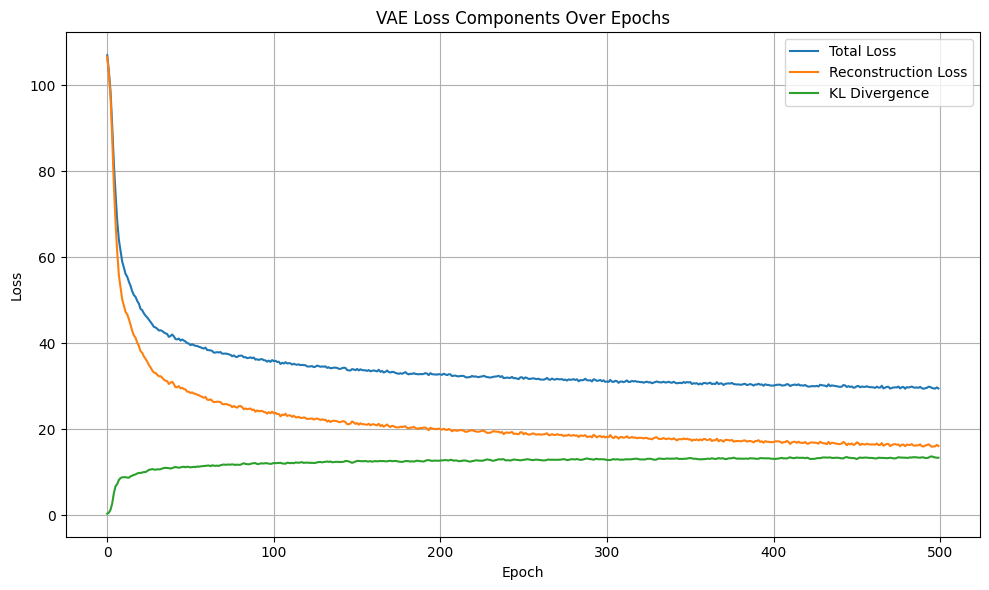

In [11]:
plot_vae_losses(total_loss_hist, recon_loss_hist, kld_loss_hist)

dim of latent mu: (331, 10)


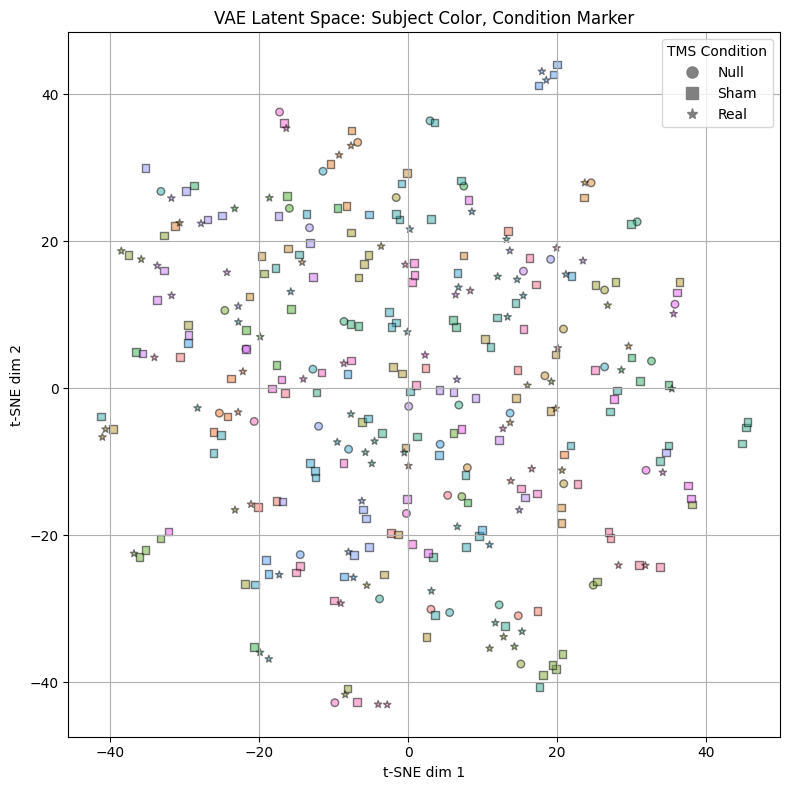

In [12]:
mu_all = get_latent_mu(model, X_tensor, device=device)
# 2d-TSNE
z_2d = TSNE(n_components=2, perplexity=8).fit_transform(mu_all)
plot_latent_embedding_by_condition_and_subject(z_2d, all_tms_type, all_subject_id)

Paired t-test: t = -2.211, p = 0.0322


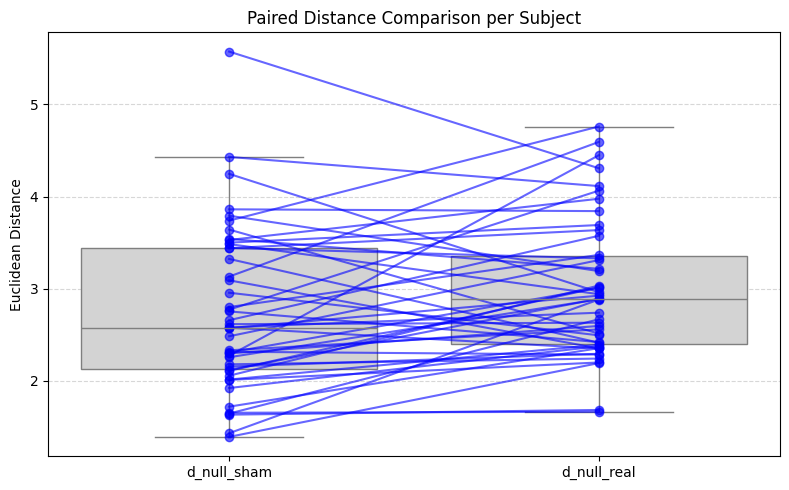

In [14]:
df = compute_condition_distances(mu_all, all_tms_type, all_subject_id, condition_map)

# Paired t-test
t_stat, p_val_t = ttest_rel(df["d_null_sham"], df["d_null_real"])
print(f"Paired t-test: t = {t_stat:.3f}, p = {p_val_t:.4f}")
plot_subject_distance_comparison(df)